In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def weights(z, x, m):
    """
    weights(z, x, m)

    Calculates finite difference weights of up to order m.

    Implements Fornberg's algorithm.

    ARGS:
        z : Location where approximations are to be accurate
        x : Vector with x-coordinates for the grid points
        m : Highest derivative that we want to find weights for

    RETURNS:
        c : Array of size [m+1, len(x)] containing (as output) in successive rows the weights for derivatives 0, 1, ..., m.

    EXAMPLE:
        To generate the 2nd order centered FD formula for the zeroth, first and second derivative, we make the following call to weights:
        c = weights(0, [-1, 0, 1], 2)

    (c) Translated by Andrew Jones from the original source by Fornberg
    """
    import numpy as np

    n = len(x)
    c = np.zeros((m+1, n))
    c1, c4 = 1, x[0] - z
    c[0,0] = 1
    for i in range(1,n):
        mn = min(i+1, m+1)
        c2, c4, c5 = 1, x[i]-z, c4
        for j in range(0, i):
            c3 = x[i] - x[j]
            c2 *= c3
            if j==i-1:
                c[1:mn,i] = c1/c2 *(np.arange(1,mn)*c[0:mn-1,i-1] - c5*c[1:mn, i-1])
                c[0,i] = -c1*c5/c2 * c[0,i-1]
            c[1:mn,j] = (c4*c[1:mn,j] - np.arange(1,mn)*c[0:mn-1,j])/c3
            c[0,j] *= c4/c3
        c1 = c2
    return c


In [3]:
x1,x2 = 0, -1+3/14

In [4]:
X1 = [-1+(2*j/14) for j in range(0,15)]
c1 = weights(x1, X1, 1)
c2 = weights(x2, X1, 1)
print('x = 0: ',c1[1])
print('\nx = -1+3/14: ',c2[1])

x = 0:  [-2.91375291e-04  4.75912976e-03 -3.71212121e-02  1.85606061e-01
 -6.80555556e-01  2.04166667e+00 -6.12500000e+00 -2.33146835e-15
  6.12500000e+00 -2.04166667e+00  6.80555556e-01 -1.85606061e-01
  3.71212121e-02 -4.75912976e-03  2.91375291e-04]

x = -1+3/14:  [ 9.79753445e-02 -6.28469871e+00  1.45927608e+00  1.68586620e+01
 -3.40222322e+01  5.24024378e+01 -6.35986536e+01  6.09341459e+01
 -4.58657660e+01  2.68184481e+01 -1.19390288e+01  3.91204558e+00
 -8.89916959e-01  1.25590997e-01 -8.28546655e-03]


In [5]:
X2 = [-cos(pi*j/14) for j in range(0,15)]
c3 = weights(x1, X2, 1)
c4 = weights(x2, X2, 1)
print('x = 0: ',c3[1])
print('\nx = -1+3/14: ',c4[1])

x = 0:  [-5.00000000e-01  1.02571686e+00 -1.10991626e+00  1.27904801e+00
 -1.60387547e+00  2.30476487e+00 -4.49395921e+00 -1.55431223e-15
  4.49395921e+00 -2.30476487e+00  1.60387547e+00 -1.27904801e+00
  1.10991626e+00 -1.02571686e+00  5.00000000e-01]

x = -1+3/14:  [-2.34795368  5.33076998 -8.86519005  1.68422527  5.94503896 -2.77765051
  1.74253197 -1.25150422  0.9763691  -0.80770354  0.69933076 -0.62886625
  0.58455002 -0.56004955  0.27610175]


In [6]:
X3 = [-0.987992518020485,-0.937273392400706,-0.848206583410427,-0.724417731360170,-0.570972172608539,
     -0.394151347077563,-0.201194093997435,0,0.201194093997435,0.394151347077563,0.570972172608539,
     0.724417731360170,0.848206583410427,0.937273392400706,0.987992518020485]

c5 = weights(x1, X3, 1)
c6 = weights(x2, X3, 1)
print('x = 0: ',c5[1])
print('\nx = -1+3/14: ',c6[1])

x = 0:  [-6.09296583e-02  2.19199848e-01 -4.54170017e-01  7.89875237e-01
 -1.30263141e+00  2.23522874e+00 -4.81860018e+00  4.49486410e-16
  4.81860018e+00 -2.23522874e+00  1.30263141e+00 -7.89875237e-01
  4.54170017e-01 -2.19199848e-01  6.09296583e-02]

x = -1+3/14:  [-2.16165471e-01  1.16716966e+00 -1.00257782e+01  9.37040284e+00
 -1.90534607e-01 -2.61316769e-01  3.06434286e-01 -2.80524123e-01
  2.37262469e-01 -1.90423499e-01  1.44734630e-01 -1.02343835e-01
  6.46449113e-02 -3.30011583e-02  9.43886631e-03]


<IPython.core.display.Javascript object>


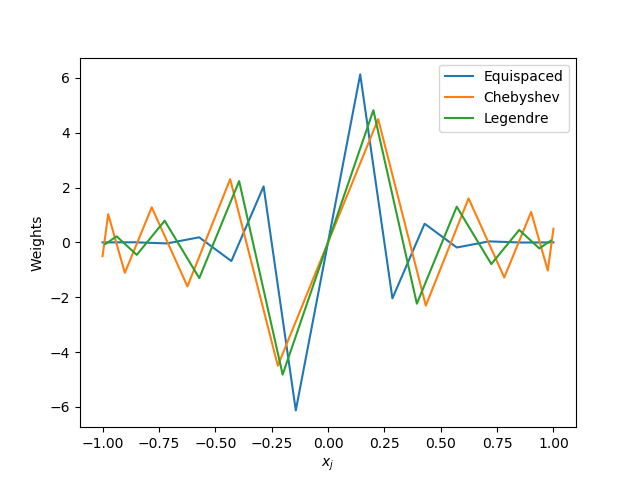

In [7]:
figure(1)
plot(X1,c1[1],label = 'Equispaced')
plot(X2,c3[1],label = 'Chebyshev')
plot(X3,c5[1],label = 'Legendre')
xlabel('$x_j$')
ylabel('Weights')
legend(loc = 'upper right')
show()

<IPython.core.display.Javascript object>


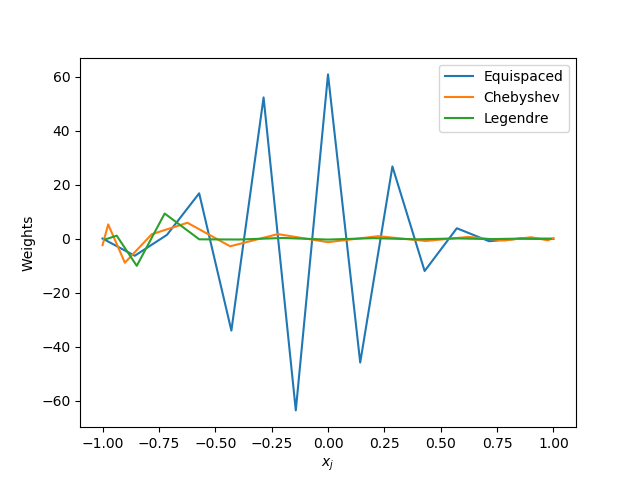

In [8]:
figure(2)
plot(X1,c2[1],label = 'Equispaced')
plot(X2,c4[1],label = 'Chebyshev')
plot(X3,c6[1],label = 'Legendre')
xlabel('$x_j$')
ylabel('Weights')
legend(loc = 'upper right')
show()